# ANNs with TFIDF and Tensorflow

Playground for trying out different feedforward NN is at:

https://playground.tensorflow.org/

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
df = pd.read_csv('../data/bbc_text.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
# map classes to integers from 0...K-1
df['labels'].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

<AxesSubplot:>

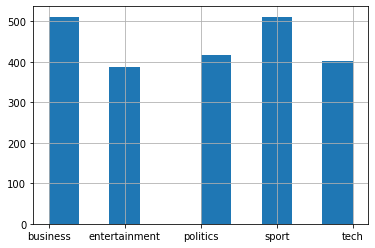

In [5]:
df['labels'].hist()

In [6]:
df['targets'] = df['labels'].astype("category").cat.codes

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [8]:
df_train.head()

,text,labels,targets
1350,Radcliffe proves doubters wrong\n\nThis won't ...,sport,3
561,Spike Lee backs student directors\n\nFilm-make...,entertainment,1
1624,Wales win in Rome\n\nWales secured their first...,sport,3
768,Rapper Kanye West's shrewd soul\n\nUS hip-hop ...,entertainment,1
861,Vera Drake's Bafta triumph hope\n\nAt the Baft...,entertainment,1


In [10]:
type(df_train['text'])

pandas.core.series.Series

In [28]:
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [29]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [30]:
# number of classes
K = df['targets'].max() + 1
K

5

In [31]:
Xtrain.shape

(1557, 25013)

In [32]:
# input dimensions
D = Xtrain.shape[1]
D

25013

In [33]:
# build model
i = Input(shape=(D,))
x = Dense(600, activation='relu')(i)
x = Dense(300, activation='relu')(x)
x = Dense(K)(x) # softmax included in loss

model = Model(i, x)

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 25013)]           0         
                                                                 
 dense_5 (Dense)             (None, 600)               15008400  
                                                                 
 dense_6 (Dense)             (None, 300)               180300    
                                                                 
 dense_7 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 15,190,205
Trainable params: 15,190,205
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [36]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [37]:
r = model.fit(
  Xtrain, Ytrain,
  validation_data=(Xtest, Ytest),
  epochs=7,
  batch_size=128,
)

Epoch 1/7
13/13 [==============================] - 1s 74ms/step - loss: 1.3536 - accuracy: 0.7932 - val_loss: 0.7246 - val_accuracy: 0.9386
Epoch 2/7
13/13 [==============================] - 1s 63ms/step - loss: 0.2374 - accuracy: 0.9968 - val_loss: 0.1244 - val_accuracy: 0.9701
Epoch 3/7
13/13 [==============================] - 1s 63ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9746
Epoch 4/7
13/13 [==============================] - 1s 64ms/step - loss: 6.7988e-04 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9760
Epoch 5/7
13/13 [==============================] - 1s 63ms/step - loss: 3.1422e-04 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9760
Epoch 6/7
13/13 [==============================] - 1s 62ms/step - loss: 2.3014e-04 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9760
Epoch 7/7
13/13 [==============================] - 1s 62ms/step - loss: 1.9688e-04 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9760


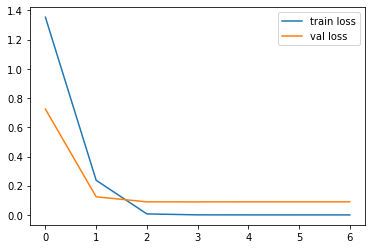

In [38]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

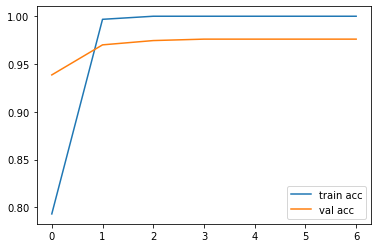

In [39]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

<AxesSubplot:>

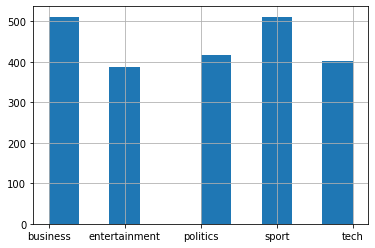

In [40]:
df['labels'].hist()